## Regression 

### Simple Linear Regression

Linear regression is  a linear or straight line relationship between the input variables (X) and the single output variable (y).

<img src='images/lr.png' width="45%"/>

### Let us consider a dataset where we have a value of response y for every feature x:

In [1]:
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

### x as a feature vector and y as a response vector

### A scatter plot of above dataset looks like:-

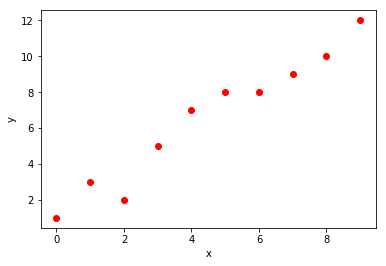

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red')

# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#### Now, the task is to find a line which fits best in above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in dataset)

- This line is called regression line.

<img src="images/lin_reg.PNG" width="20%"/>
<img src="images/bfind.PNG" width="90%"/>

In [ ]:
### find m and b

In [ ]:
def best_fit_slope(x,y):
    m= (((np.mean(x)*np.mean(y))-np.mean(x*y))/
        ((np.mean(x)**2)-np.mean(x**2)))
    b = np.mean(y) - m*np.mean(x)
   
    return m,b

In [ ]:
m,b = best_fit_slope(x,y)
print (m,b)

In [ ]:
reg=[]
for i in x:
    reg.append((m*i+b))

In [ ]:
#m*2+b

In [ ]:
regression_line = [(m*i+b) for i in x]    

In [ ]:
regression_line

In [ ]:
#y_pred

In [ ]:
y

In [ ]:
# for visualization
plt.scatter(x,y,color='red')
#plt.scatter(x,regression_line,color='black')
#plt.scatter(predict_x,predict_y,color='green')
plt.plot(x, regression_line)
#plt.plot(x,y)
# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### R^2 (coefficient of determination):regression score function.


- The R^2 (or R Squared) metric provides an indication
  of the goodness of fit of a set of predictions to the
  actual values. In statistical literature,
  this measure is called the coefficient of determination.

- a model fits the data well if the differences between the
  observed values and the model's predicted values are small.

- R-squared is a statistical measure of how close the data
  are  to the fitted regression line.

- the higher the R-squared, the better the model fits your
  data.

- value between 0 and 1 

- The distance between the regression line's y values,
  and the data's y values is the error, then we square that. 


<img src='images/r2.PNG' width='40%'/>

### 1-((sum of the squared error of the line) / (sum of squared error of the y mean))

- **SE line** = (y1-(mx1+b))+(y2-(mx2+b))+.....(yn-(mxn+b))


- **SE y mean** = (y1-mean(y))+(y2-mean(y))+....(yn-mean(y))

if SE line is small ==> line is a good fit or r^2 close to 1

if SE line is large ===> r^2 close to 0 (i.e line is not fitted well)



<img src="images/rsq.png" />

In [ ]:
def squared_error(ys_original,ys_line):
    return sum((ys_line-ys_original)**2)

In [ ]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [ ]:
r_squared = coefficient_of_determination(y,regression_line)
print(r_squared)

### Now Using scikit-learn...

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
x.ndim

In [ ]:
x

In [ ]:
x.reshape(-1,1).ndim

In [ ]:
#x.reshape(-1,1).ndim

In [ ]:
x_new=x.reshape(-1,1)

In [ ]:
x_new.ndim

In [ ]:
lg = LinearRegression()
#lg.fit(x_new,y)

In [ ]:
#fit(x,y):train model/algorithm with data
#predict():make prediction

In [ ]:
lg.fit(x_new,y)

In [ ]:
print lg.coef_
lg.intercept_


In [ ]:
#x_new[1][0]*lg.coef_[0]+lg.intercept_

In [ ]:
y_pred=lg.predict(x_new)

#y_true,y_pred
r2_score(y,y_pred)

In [ ]:
#regression_line

In [ ]:
y_pred

In [ ]:
a=[[10]]

In [ ]:
a=np.array(a)

In [ ]:
lg.predict(a)

In [ ]:
x_new[1][0]

In [ ]:
x_new[1][0]*lg.coef_[0]+lg.intercept_

In [ ]:
y_pred[1]

In [ ]:
y_pred[1]

### Take another example

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [21]:
#r2_score:for checking regression model performance

In [4]:
data = pd.read_csv('dataset/Salary_Data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.shape

(30, 2)

In [ ]:
#print data.columns

In [6]:
X = data.iloc[:,0].values

In [7]:
y = data['Salary'].values

### split data into training and testing test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=5,random_state=10)

In [10]:
X_train.ndim

1

In [11]:
X_new=X_train.reshape(-1,1)
X_test_new = X_test.reshape(-1,1)

In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_reg = LinearRegression()  #model/algorithm

#train model using training data 
lin_reg.fit(X_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
lin_reg.coef_

array([9398.32194357])

In [16]:
lin_reg.intercept_

26081.9584827586

In [17]:
y_pred = lin_reg.predict(X_test_new)

In [18]:
y_test

array([91738., 54445., 56642., 37731., 43525.])

In [19]:
y_pred

array([89990.54769906, 56156.58870219, 53337.09211912, 40179.44139812,
       44878.60236991])

In [20]:
#actual,pred
r2_score(y_test,y_pred)

0.985995785317555

In [23]:
X_test_new[0]

array([6.8])

In [25]:
(lin_reg.coef_[0]*X_test_new[0])+lin_reg.intercept_

array([89990.54769906])

In [26]:
y_pred[0]

89990.54769905956

In [ ]:
#!pip install matplotlib

In [28]:
import matplotlib.pyplot as plt

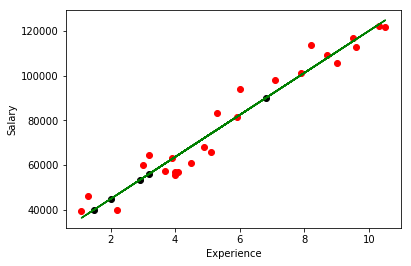

In [34]:
plt.scatter(X_train,y_train,color='red')   #training data

plt.scatter(X_test,y_pred,color='black')   #testing data
plt.plot(X_train,lin_reg.predict(X_train.reshape(-1,1)),color='green')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
#sse depends on coff and intercept

#DL to make error low as possible by tunning the paremeters(m,b)